<a href="https://colab.research.google.com/github/siddham04/GST-Analytics-Prediction-Model/blob/main/GST_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **GST Analytics**



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1**    - Simrit Garg
##### **Team Member 2**  -Siddham Jain



# **Project Summary -**

###This project focuses on analyzing and building machine learning models using a Goods and Services Tax (GST) dataset containing 21 columns and over 780,000 entries. The goal is to predict specific tax-related outcomes, ensuring high accuracy while managing data quality and addressing key challenges such as missing values, outliers, multicollinearity, and model optimization.

###The primary objective was to identify patterns within the dataset and develop a robust machine learning model to predict tax-related outcomes. Throughout the process, data preprocessing played a crucial role, especially in managing missing values and handling outliers using statistical methods like Z-score and Interquartile Range (IQR). Yeo-Johnson transformations were applied to normalize the distributions and reduce skewness.

###One of the key challenges encountered was multicollinearity, where several features were highly correlated, potentially affecting the model's performance. While the Variance Inflation Factor (VIF) helped identify these correlations, removing the correlated features resulted in a 20% drop in accuracy. Thus, a strategic decision was made to retain certain correlated columns, as they contributed to better model performance. A Logistic Regression model was implemented, optimized through hyperparameter tuning using GridSearchCV. Parameters like regularization strength (C), penalty types (l1, l2, elasticnet, none), and solver options (liblinear, saga) were fine-tuned to enhance the model's accuracy.

###Overall, this project demonstrated the complexities of working with a large and nuanced dataset like GST. The combination of data preprocessing, multicollinearity management, and hyperparameter tuning resulted in a highly accurate and reliable prediction model. Future improvements may include exploring more complex models, such as Random Forest or XGBoost, and implementing dimensionality reduction techniques like PCA to enhance the efficiency and performance of the predictive model.



###***Dataset Information***

* Number of instances: 785133

* Number of attributes: 24 (including the target variable)



# **GitHub Link -**

https://github.com/siddham04/GST-Analytics-Prediction-Model


# **Problem Statement**



Given a dataset D, which consists of:
*  Dtrain A matrix of dimension R(m×n) representing the training data.

*   Dtest A matrix of dimension R(m1×n) representing the test data.

*   We have also provided corresponding target variable Ytrain matrix dimension of R(m×1)

*  Ytest   with matrix dimension of R(m1×1).









The objective is to construct a predictive model Fθ(X)→ Ypred that accurately estimates the target variable Y{i} for new, unseen inputs X{i}



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [69]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import scipy.stats as stats

### Dataset Loading

In [70]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [72]:
# Load Dataset
x_train = pd.read_csv('X_Train_Data_Input.csv')
x_test=pd.read_csv('X_Test_Data_Input.csv')
y_train=pd.read_csv('Y_Train_Data_Target.csv')
y_test=pd.read_csv('Y_Test_Data_Target.csv')

### Dataset First View

In [73]:
# Dataset First Look
x_train.sample(5)

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
462051,ee3f061c4cdd63f66ac8a8afb1330f0e,0.0,1515,2689.0,0.678139,0.488309,-0.007469,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,1.0,0,0,0
343807,f90307ad473eee1ef6118d657e21ca90,0.0,2495,4364.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.461534,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
504554,d337268acd9e89688c2405411990943c,0.0,480,981.0,0.452580,0.062121,-0.007469,-0.405568,-0.015607,1.497066,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
519339,648a118f5d3a23f51cb0437fdb0f7a4c,0.0,541,4453.0,0.678139,0.062121,-0.007469,3.440508,-0.015604,0.144350,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0
577203,55656ab0db7e4c27ac780ea8bfc59b90,0.0,445,781.0,0.001462,0.062121,-0.007468,-0.407939,-0.015607,0.208407,...,1,1,0.001350,0.00339,0.0,0,0.0,0,0,0


### Dataset Rows & Columns count

In [74]:
# Dataset Rows & Columns count
x_train.shape

(785133, 23)

### Dataset Information

In [75]:
# Dataset Info
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785124 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   658830 non-null  float64
 5   Column4   657423 non-null  float64
 6   Column5   617953 non-null  float64
 7   Column6   781283 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   781283 non-null  float64
 10  Column9   52996 non-null   float64
 11  Column10  785133 non-null  int64  
 12  Column11  785133 non-null  int64  
 13  Column12  785133 non-null  int64  
 14  Column13  785133 non-null  int64  
 15  Column14  419430 non-null  float64
 16  Column15  768677 non-null  float64
 17  Column16  785133 non-null  float64
 18  Column17  785133 non-null  int64  
 19  Column18  785133 non-null  float64
 20  Colu

#### Duplicate Values

In [76]:
# Dataset Duplicate Value Count
duplicate_count = x_train.duplicated().sum()

duplicate_count

0

#### Missing Values/Null Values

In [77]:
# Missing Values/Null Values Count
null_values = x_train.isnull().sum().reset_index()
null_values

,index,0
0,ID,0
1,Column0,9
2,Column1,0
3,Column2,0
4,Column3,126303
5,Column4,127710
6,Column5,167180
7,Column6,3850
8,Column7,0
9,Column8,3850


<Axes: >

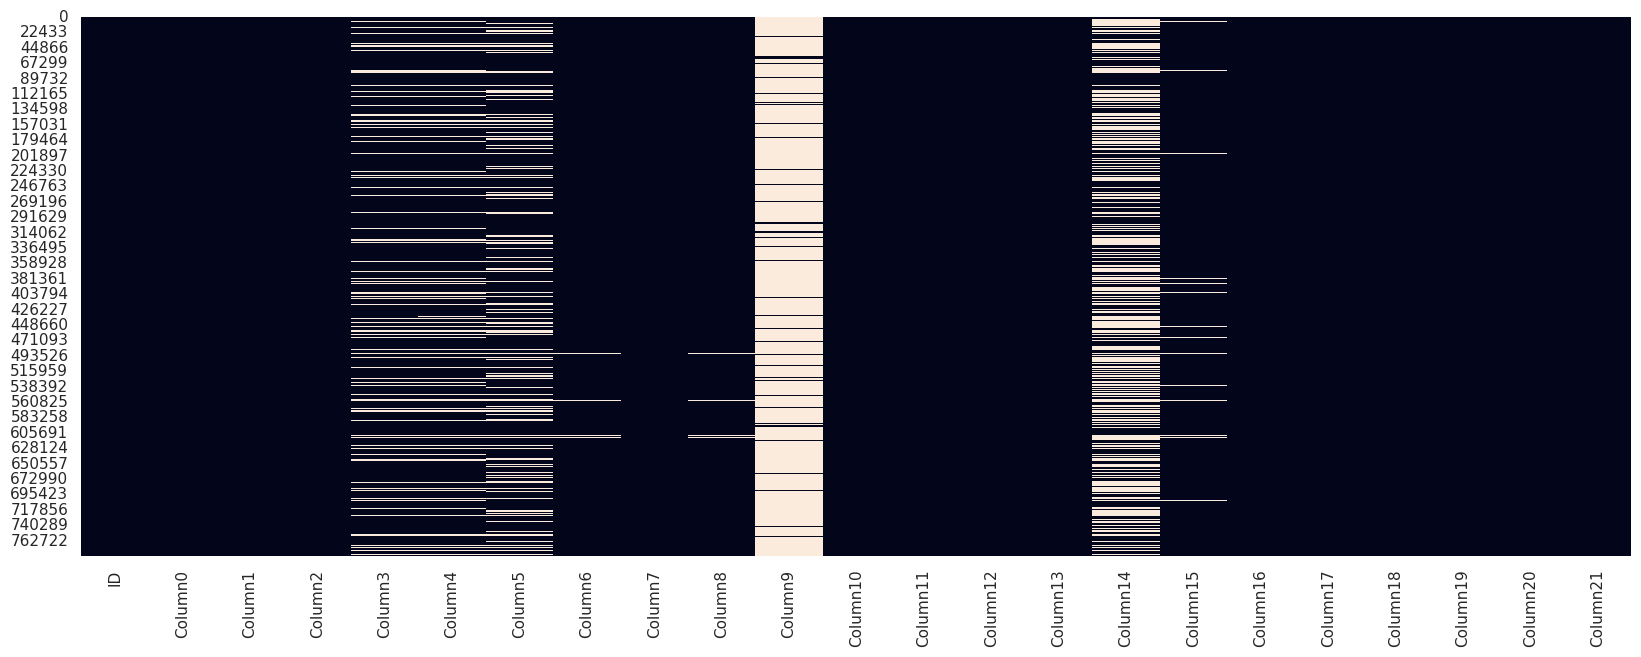

In [78]:
# Visualizing the missing values
plt.figure(figsize = (20,7))
sns.heatmap(x_train.isnull(), cbar=False)

### What did you know about your dataset?

This dataset have rows 785133 and 23 columns with no duplicated values.It has major missing in some columns comments.Dataset have 9 int64 data_type columns ,13 float64 column and 1 object data type columns.
By visualising, we can see that Column 3,4,5,9,14 have a many null values while Column 6,8,15 contain some null values.


## ***2. Understanding Your Variables***

In [79]:
# Dataset Columns
print(x_train.columns)

Index(['ID', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21'],
      dtype='object')


In [80]:
# Dataset Describe
x_train.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
count,785124.000000,785133.000000,785133.000000,658830.000000,657423.000000,617953.000000,781283.000000,785133.000000,781283.000000,52996.000000,...,785133.000000,785133.000000,419430.000000,768677.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000
mean,0.440757,1321.788614,2951.279411,-0.000210,-0.000855,-0.000367,-0.000709,0.000727,-0.000158,0.005245,...,0.363122,0.328285,-0.000863,-0.000837,0.001206,0.270092,0.147856,0.018759,0.009351,0.002757
std,1.163275,907.267965,2143.140140,0.999935,1.000350,1.015255,0.998984,1.045883,1.056769,1.111058,...,0.480900,0.469589,1.291202,1.283393,0.034855,3.128214,0.430530,0.135671,0.096249,0.052439
min,0.000000,-1080.000000,-47.000000,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,-0.088554,...,0.000000,0.000000,-832.749615,-1091.545904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,515.000000,1129.000000,-0.675216,-0.577162,-0.007469,-0.407939,-0.015607,-0.774979,-0.086503,...,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1173.000000,2709.000000,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,-0.081820,...,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2435.000000,4472.000000,0.678139,0.701403,-0.007468,-0.367723,-0.015607,0.625528,-0.063140,...,1.000000,1.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,2499.000000,10290.000000,0.678139,0.701403,551.421127,14.985817,201.687947,323.992484,133.911803,...,1.000000,1.000000,8.514416,0.012736,2.000000,728.000000,12.000000,1.000000,1.000000,1.000000


### Variables Description

We can see the statistical description of all the columns and we can see that there are some columns which contains negative values , some columns are boolean type also.


We can see the counts of all the value.

### Check Unique Values for each variable.

In [81]:
# Check Unique Values for each variable.
unique_values = x_train.nunique().reset_index()
unique_values

,index,0
0,ID,785133
1,Column0,19
2,Column1,2564
3,Column2,9424
4,Column3,47
5,Column4,47
6,Column5,148334
7,Column6,157264
8,Column7,166513
9,Column8,355728


## 3. ***Data Wrangling***

### Data Wrangling Code

In [82]:
# Write your code to make your dataset analysis ready.
# remove null values from occupations,all_apeakers and recorded date
x_train['Column18']=x_train['Column18'].astype(int)
x_train['Column16']=x_train['Column16'].astype(int)


x_test.drop('Column9',axis=1,inplace=True)
x_train.drop('Column9',axis=1,inplace=True)
x_train.drop('Column14',axis=1,inplace=True)
x_test.drop('Column14',axis=1,inplace=True)
x_train.drop('ID',axis=1,inplace=True)
x_test.drop('ID',axis=1,inplace=True)
y_train.drop('ID',axis=1,inplace=True)
y_test.drop('ID',axis=1,inplace=True)



x_test['Column18']=x_test['Column18'].astype(int)
x_test['Column16']=x_test['Column16'].astype(int)

In [83]:
# We will not be performing multicollinearity as it was resulting in the decrease in the models accuracy

In [84]:
x_train

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,Column11,Column12,Column13,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,0,0,0,0,0.00339,0,0,0,0,0,0
1,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,0,0,0,0,0.00339,0,0,0,0,0,0
2,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,1,1,1,1,0.00339,0,0,0,0,0,0
3,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,0,0,0,0,0.00339,0,0,1,0,0,0
4,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,0,0,0,0,0.00339,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785128,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,0,0,0,0,0.00339,0,0,1,0,0,0
785129,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,1,1,1,1,0.00339,0,0,0,0,0,0
785130,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,0,0,1,1,0.00339,0,0,0,0,0,0
785131,0.0,2480,4493.0,0.001462,0.062121,-0.007468,-0.407939,-0.015607,0.400071,1,1,1,1,0.00339,0,0,0,0,0,0


In [85]:
# replace the null values with avg of column
x_train['Column0'].fillna(x_train['Column0'].mean(),inplace =True)
x_test['Column0'].fillna(x_test['Column0'].mean(),inplace =True)

x_train['Column3'].fillna(x_train['Column3'].mean(),inplace =True)
x_test['Column3'].fillna(x_test['Column3'].mean(),inplace =True)

x_train['Column5'].fillna(x_train['Column5'].mean(),inplace =True)
x_test['Column5'].fillna(x_test['Column5'].mean(),inplace =True)

x_train['Column6'].fillna(x_train['Column6'].mean(),inplace =True)
x_test['Column6'].fillna(x_test['Column6'].mean(),inplace =True)

x_train['Column8'].fillna(x_train['Column8'].mean(),inplace =True)
x_test['Column8'].fillna(x_test['Column8'].mean(),inplace =True)

x_train['Column15'].fillna(x_train['Column15'].mean(),inplace =True)
x_test['Column15'].fillna(x_test['Column15'].mean(),inplace =True)

In [86]:
# Again check the null values
x_test.isnull().sum().reset_index()


,index,0
0,Column0,0
1,Column1,0
2,Column2,0
3,Column3,0
4,Column4,42710
5,Column5,0
6,Column6,0
7,Column7,0
8,Column8,0
9,Column10,0


### What all manipulations have you done and insights you found?

Inference:-

1.First of all we removed all the null values.

2.Drop all the unwanted columns.

3.Changed datatypes to integer from float.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

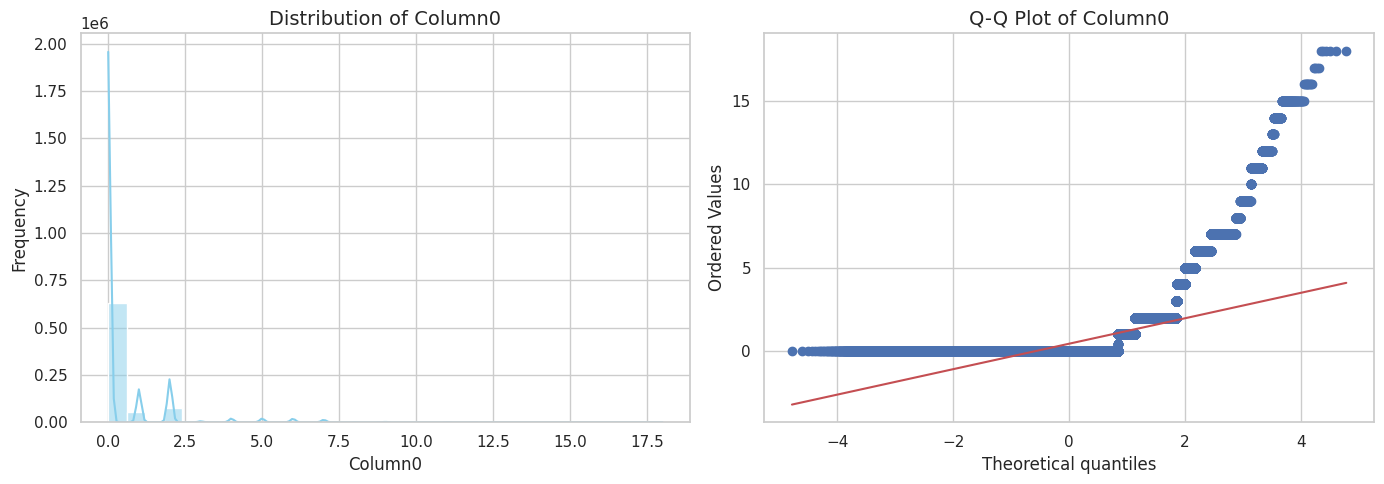

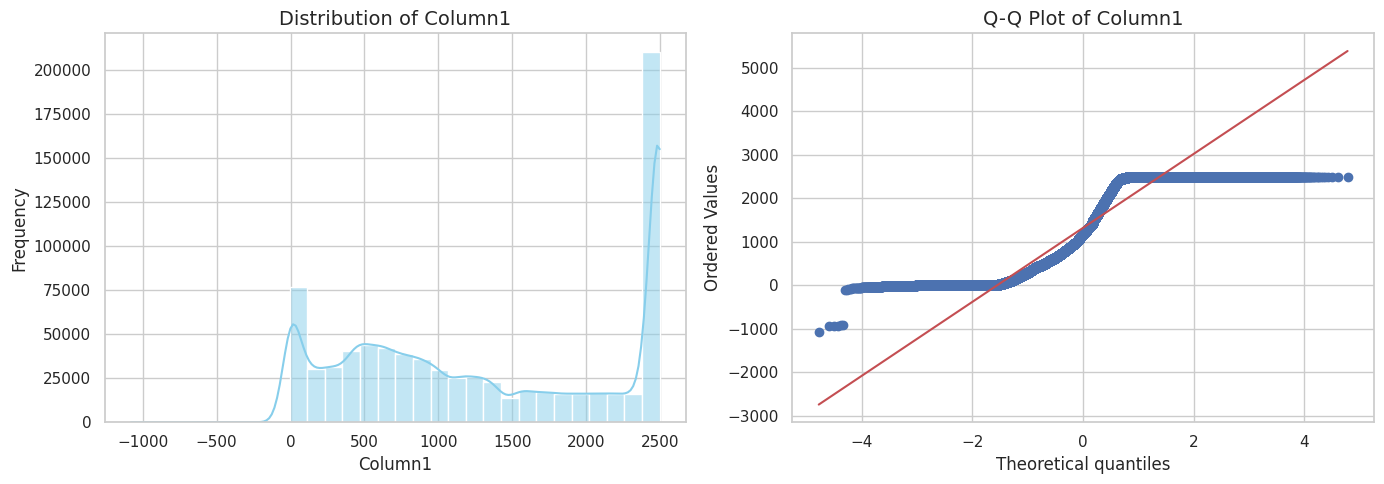

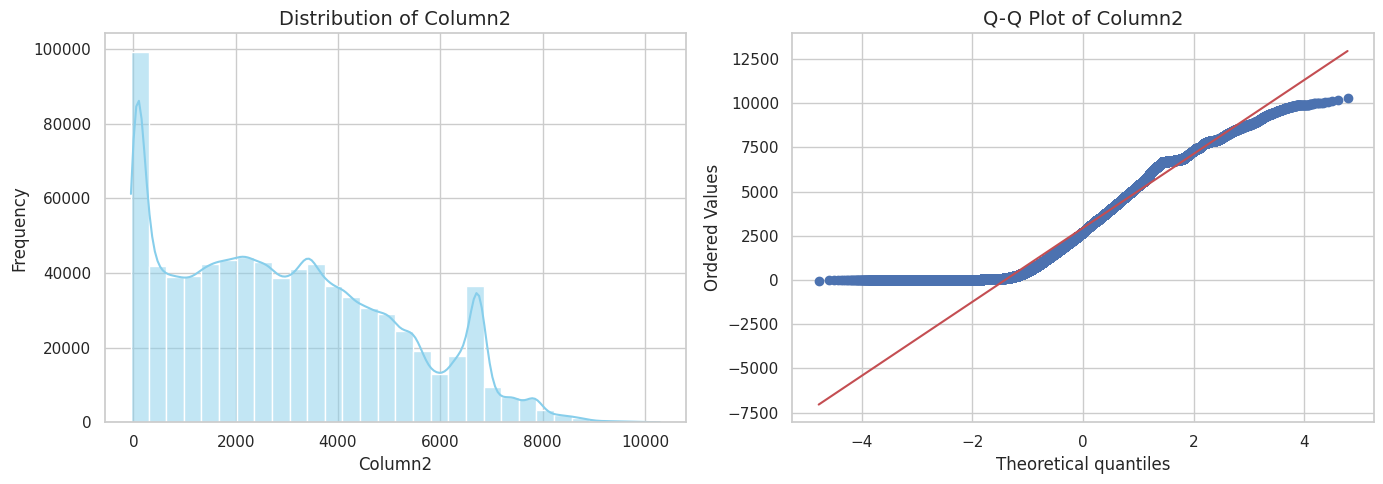

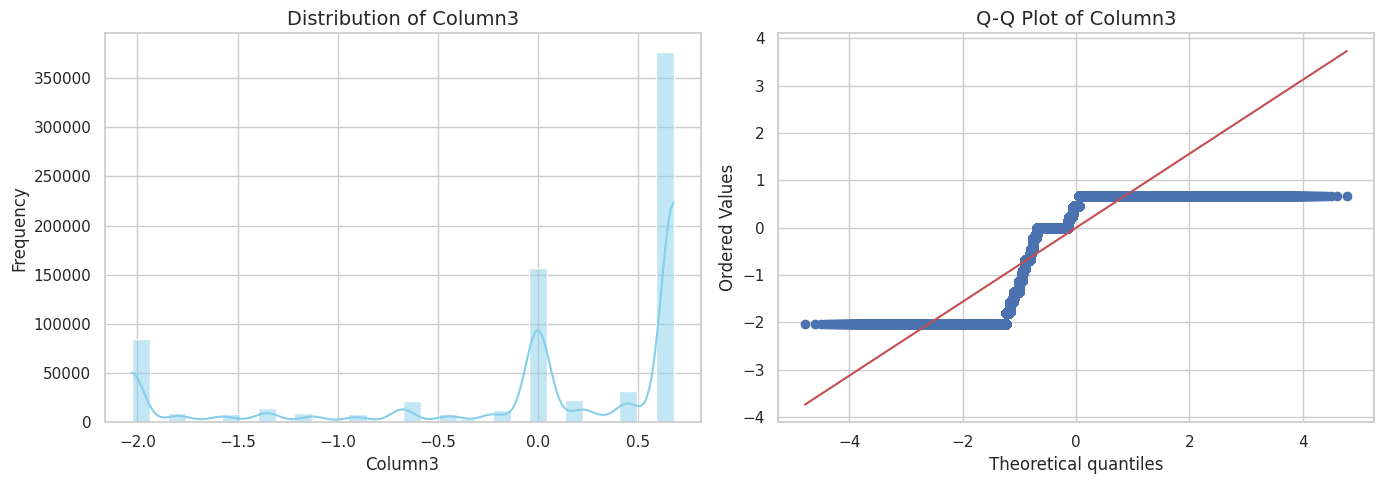

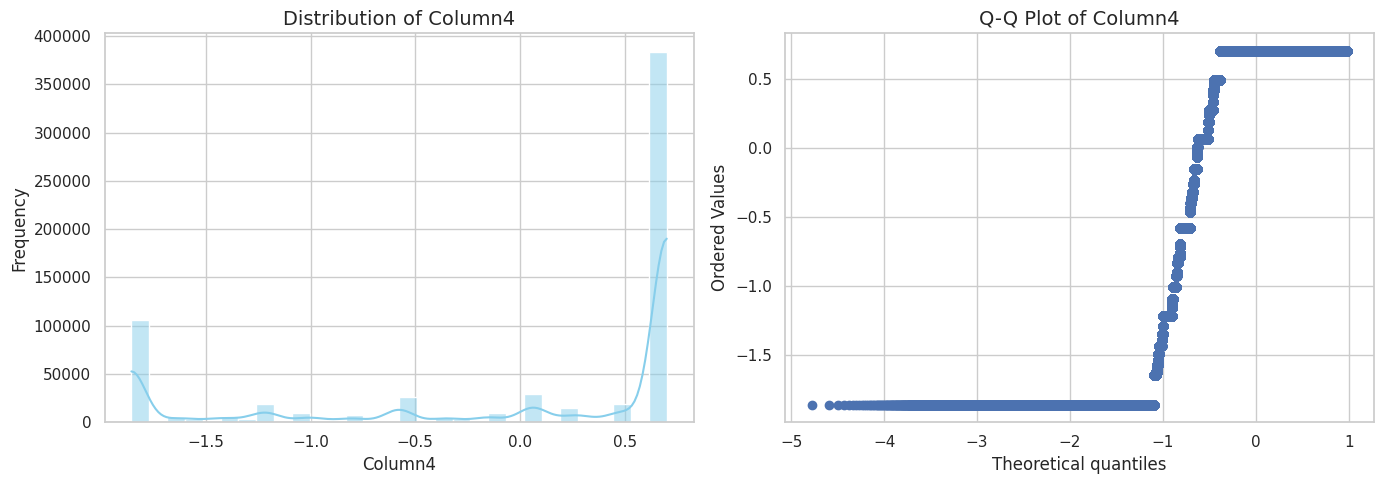

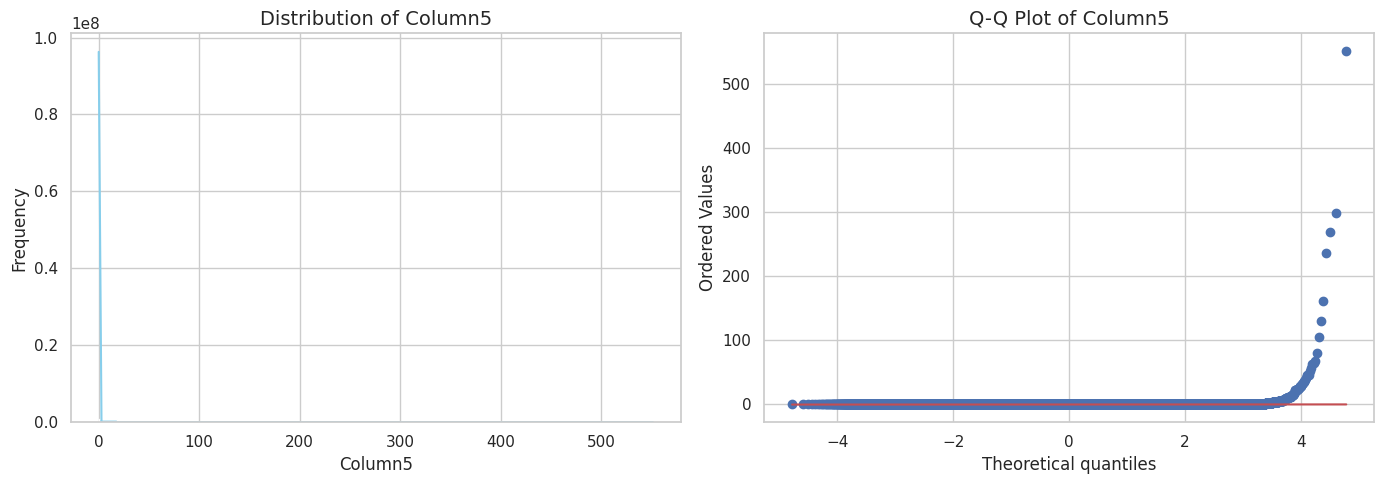

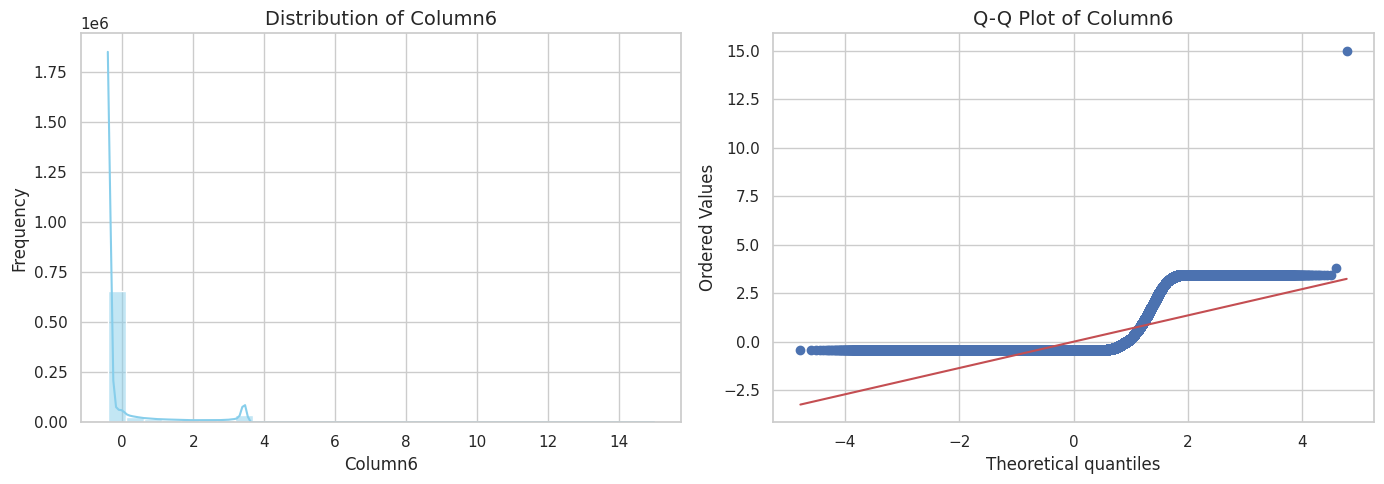

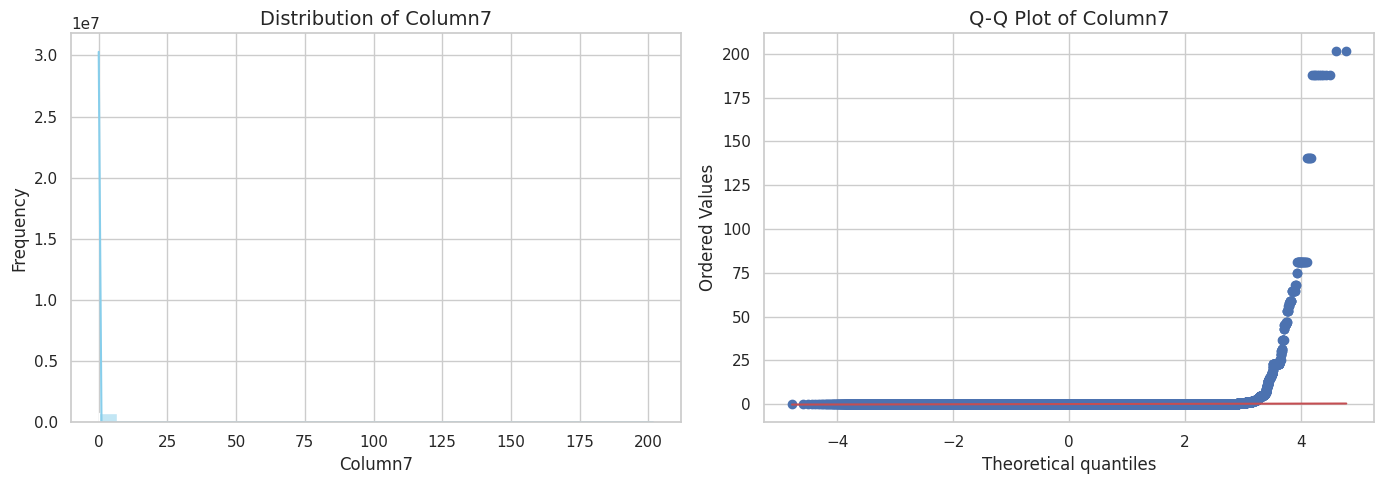

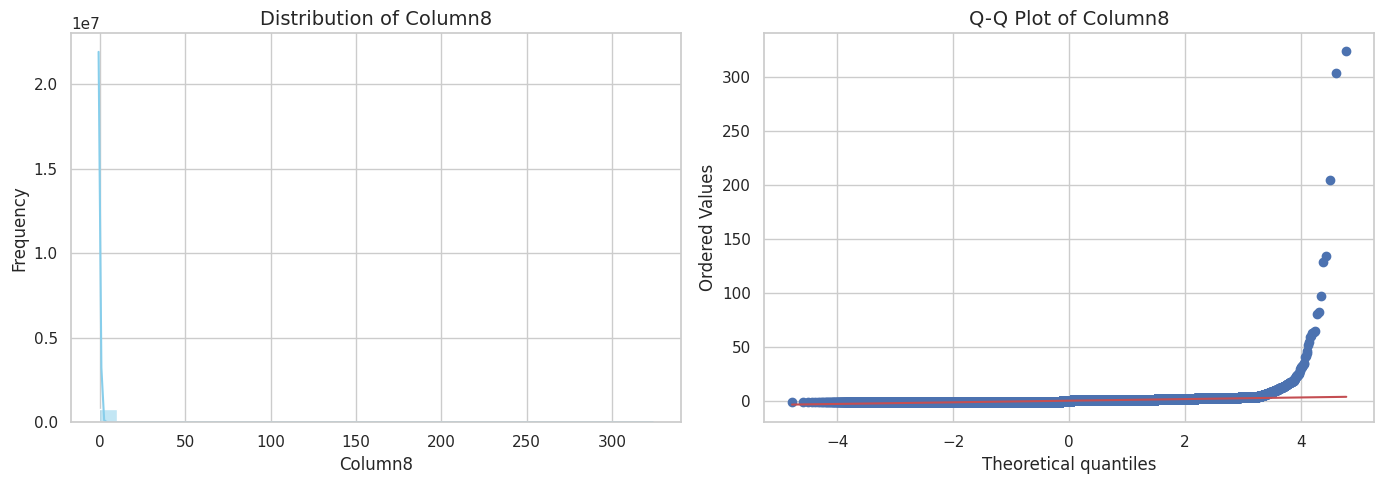

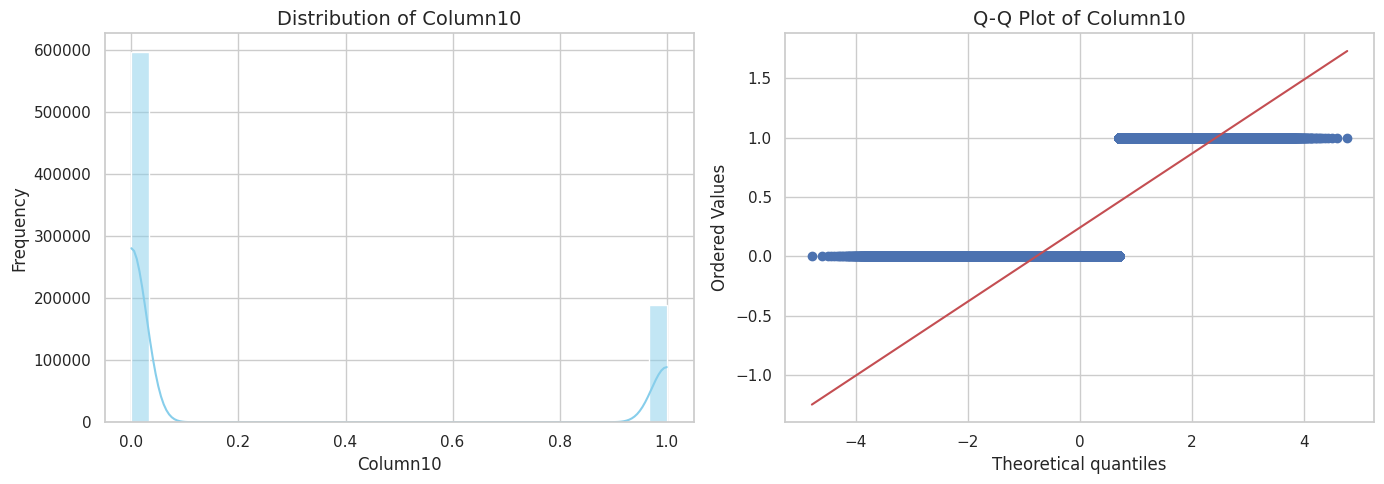

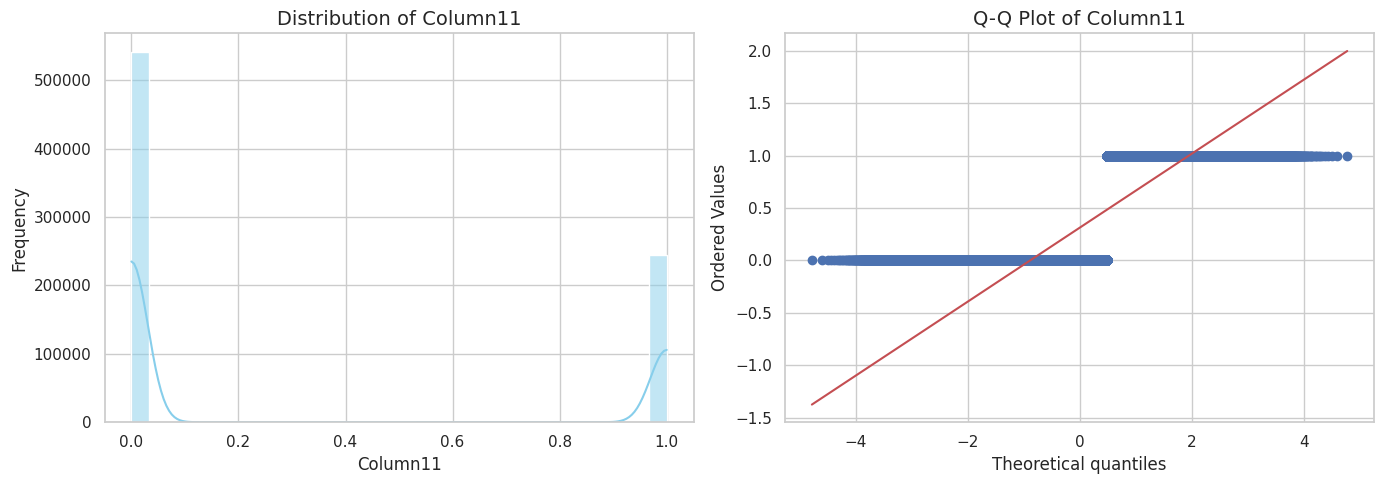

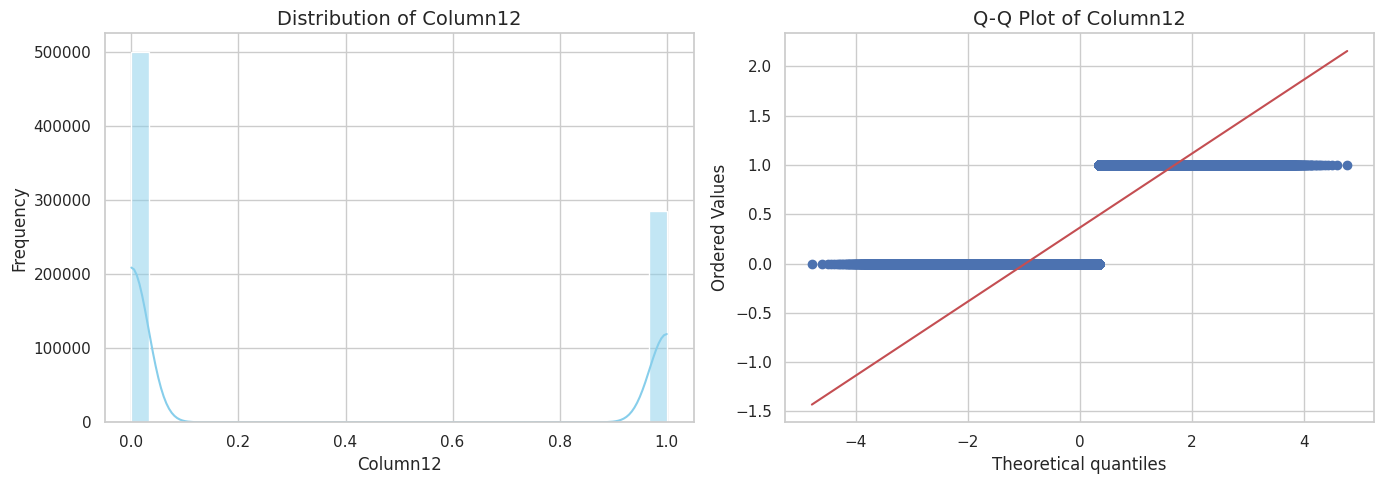

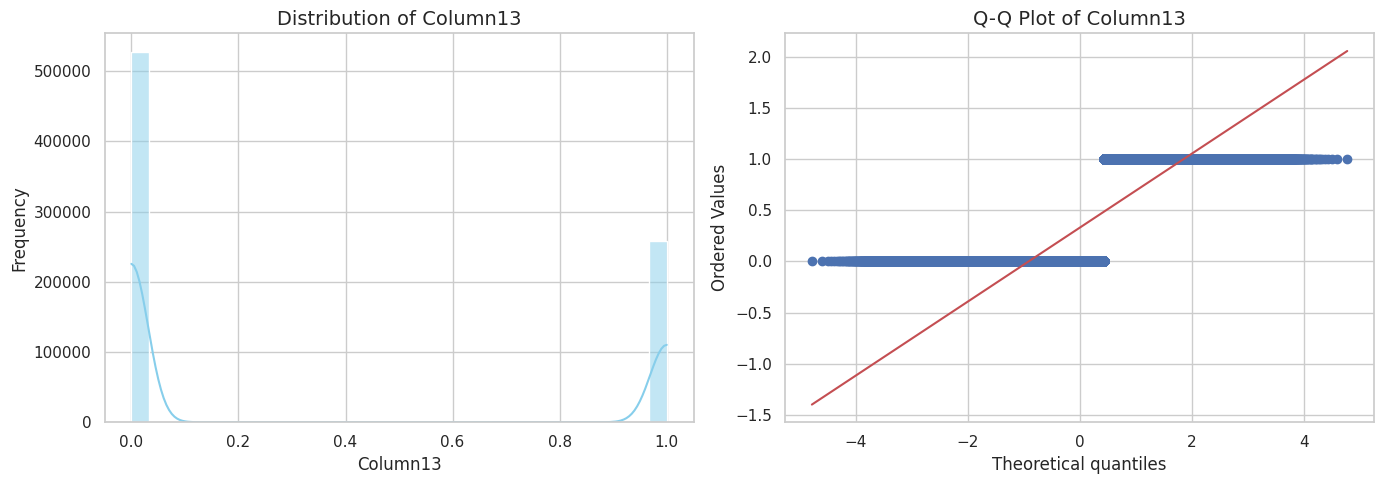

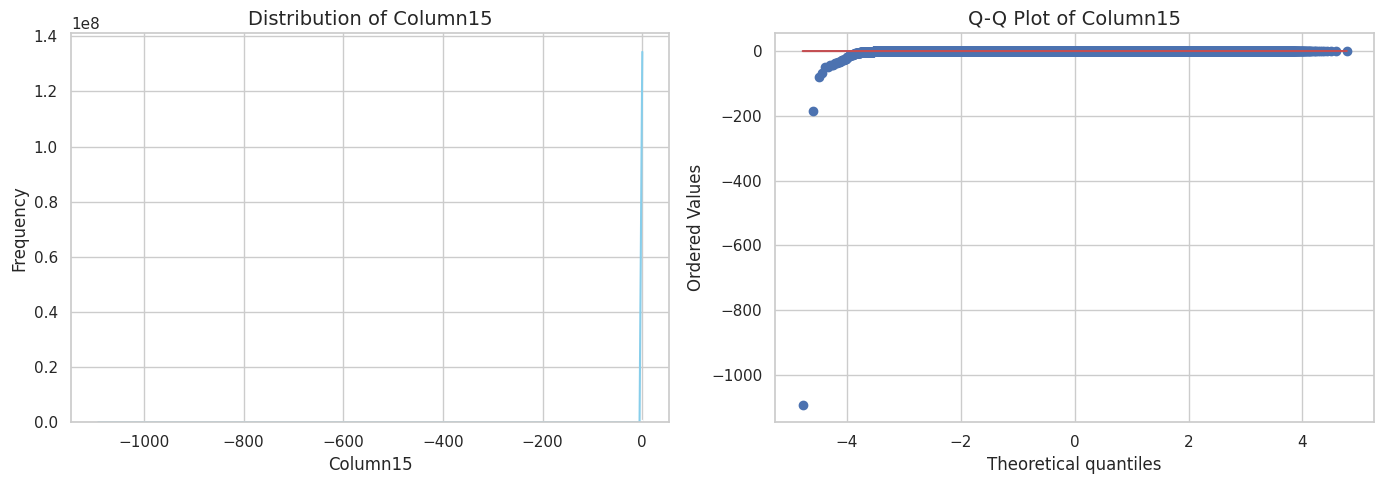

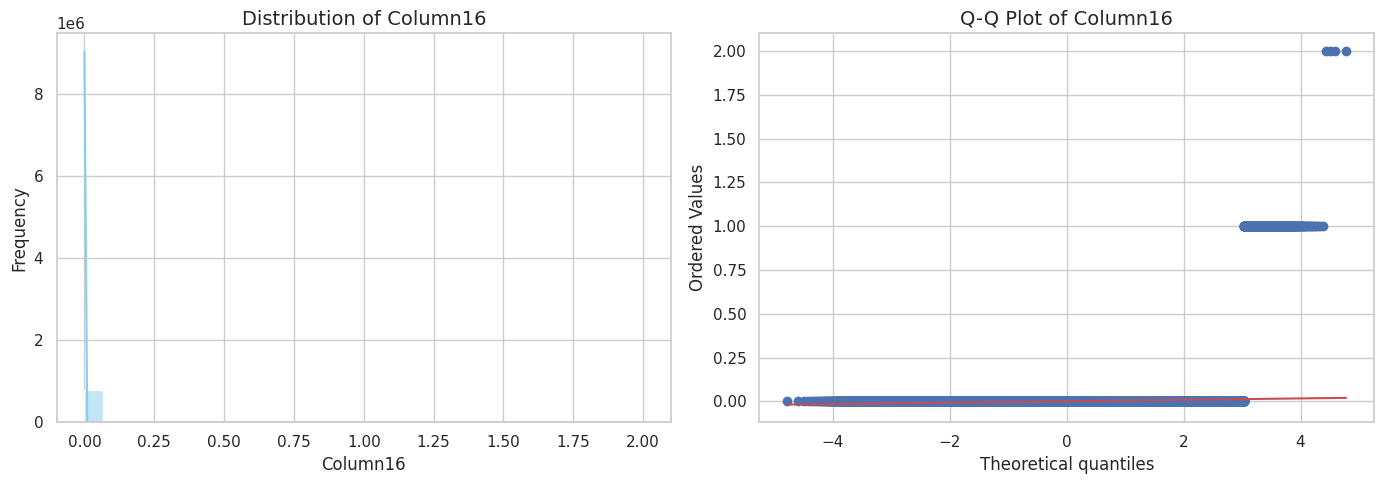

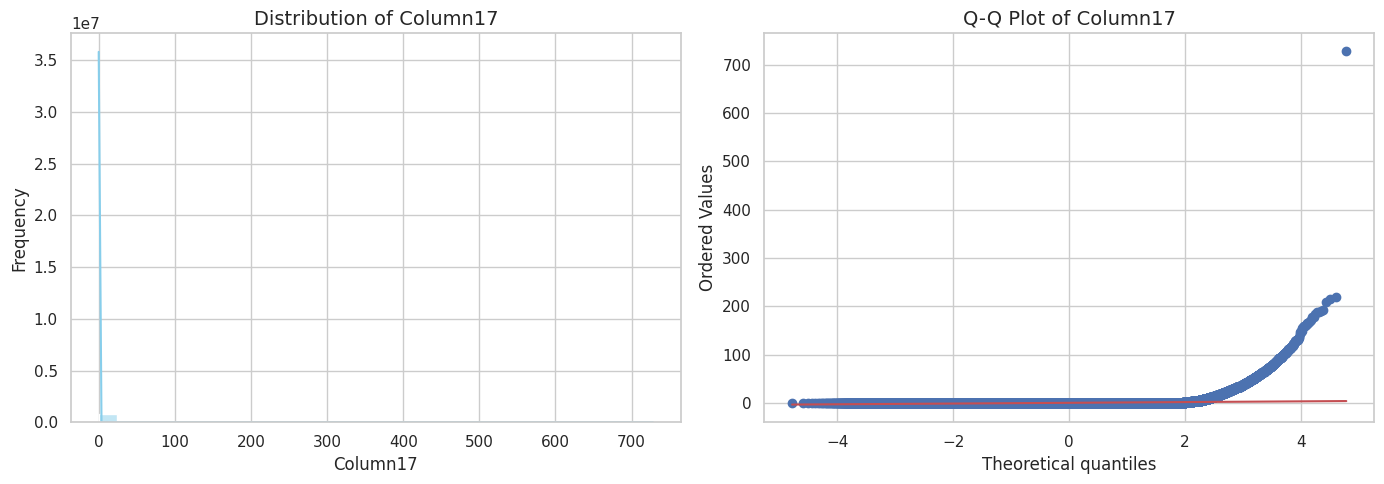

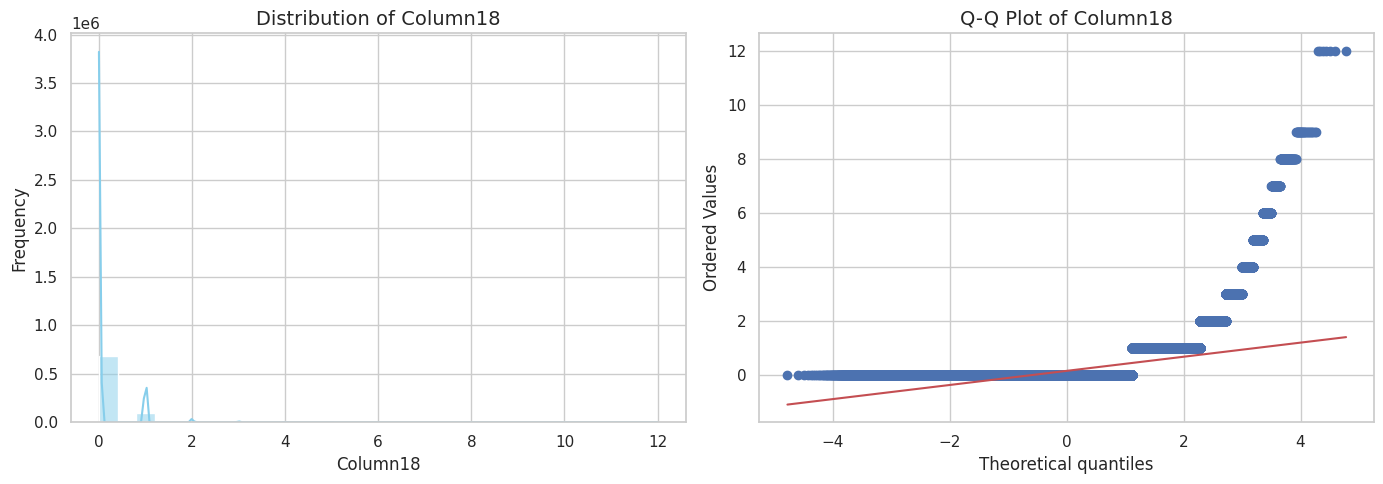

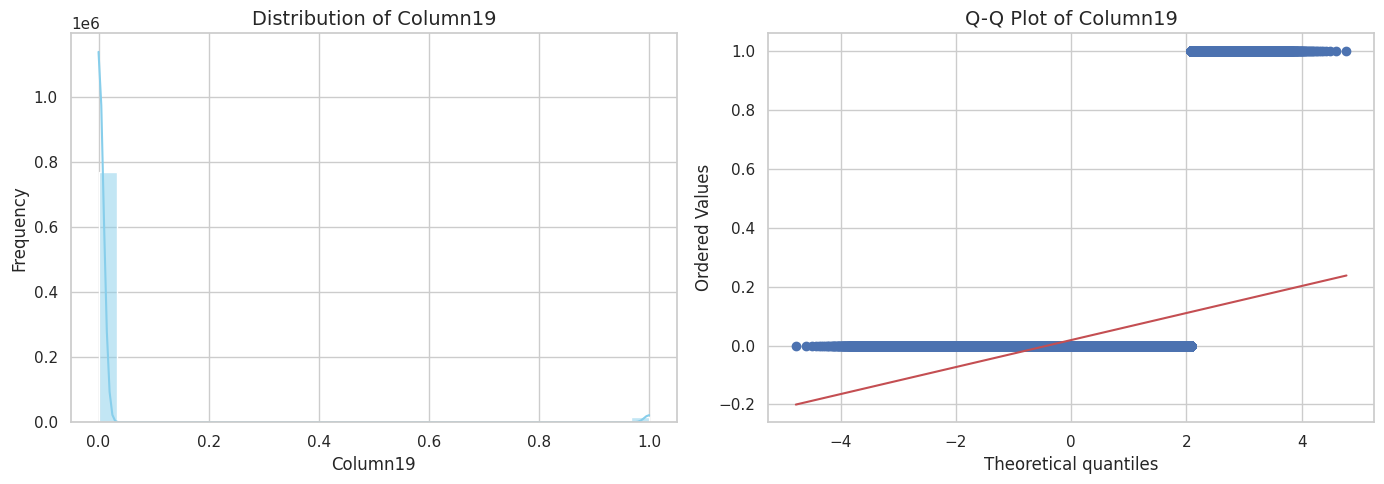

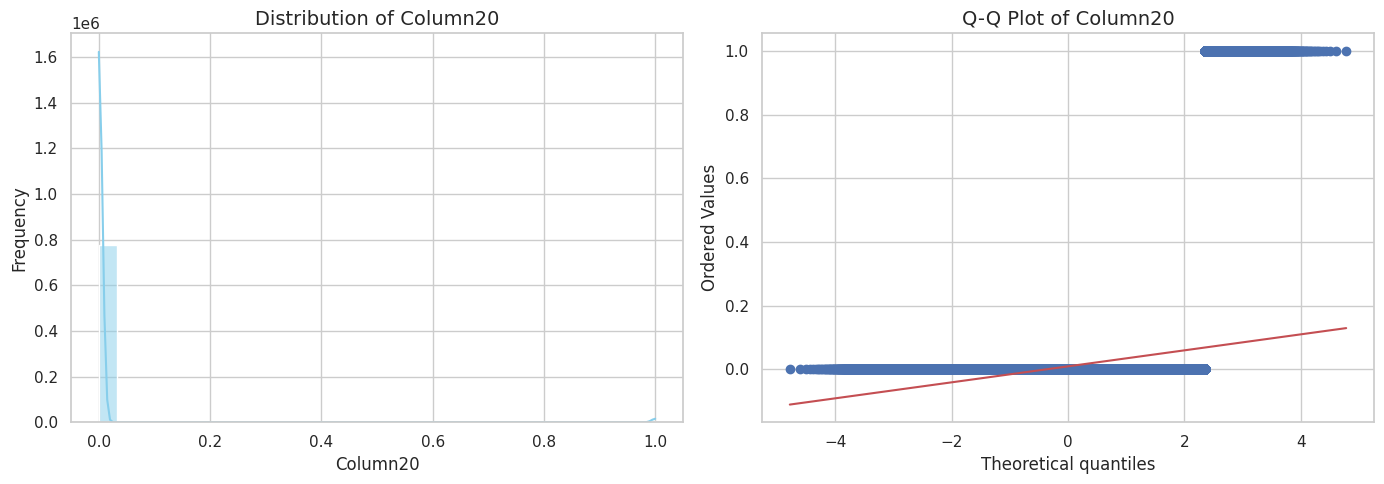

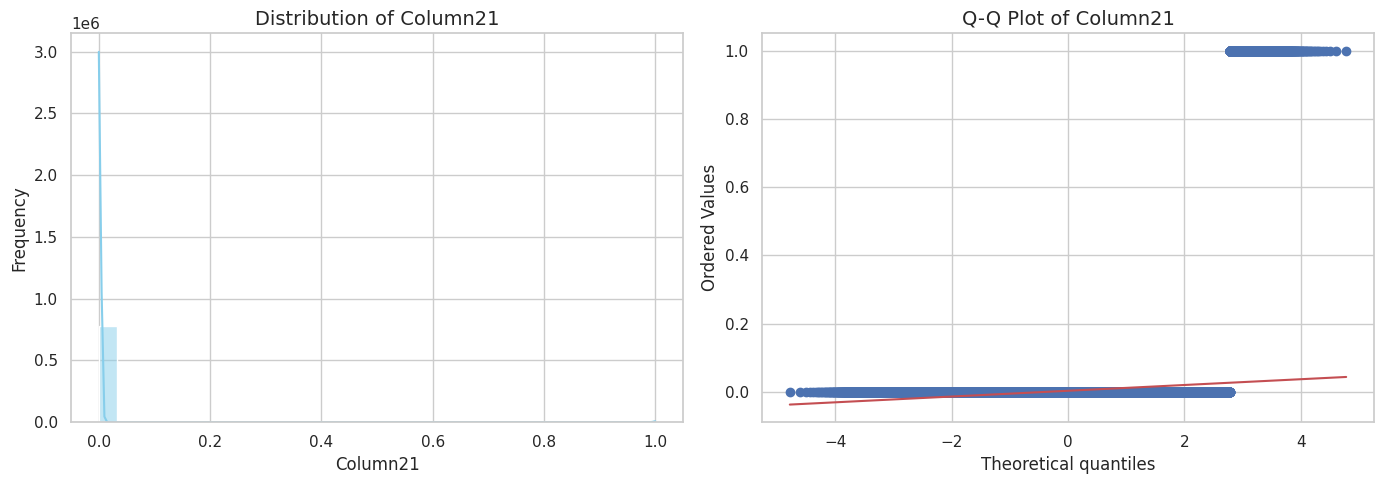

In [87]:
# Chart - 1 visualization code

sns.set(style='whitegrid')
for col in x_train.columns:
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(x_train[col], kde=True, color='skyblue', bins=30)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.subplot(1, 2, 2)
    stats.probplot(x_train[col], dist='norm', plot=plt)
    plt.title(f"Q-Q Plot of {col}", fontsize=14)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

To check the skewness of the data.



##### 2. What is/are the insight(s) found from the chart?

Most of the data is skewed and there are some of the columns which are normalised

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As i know that the data is skewed now i can do the particular transformations for the same to make the model normalised

#### Chart - 2

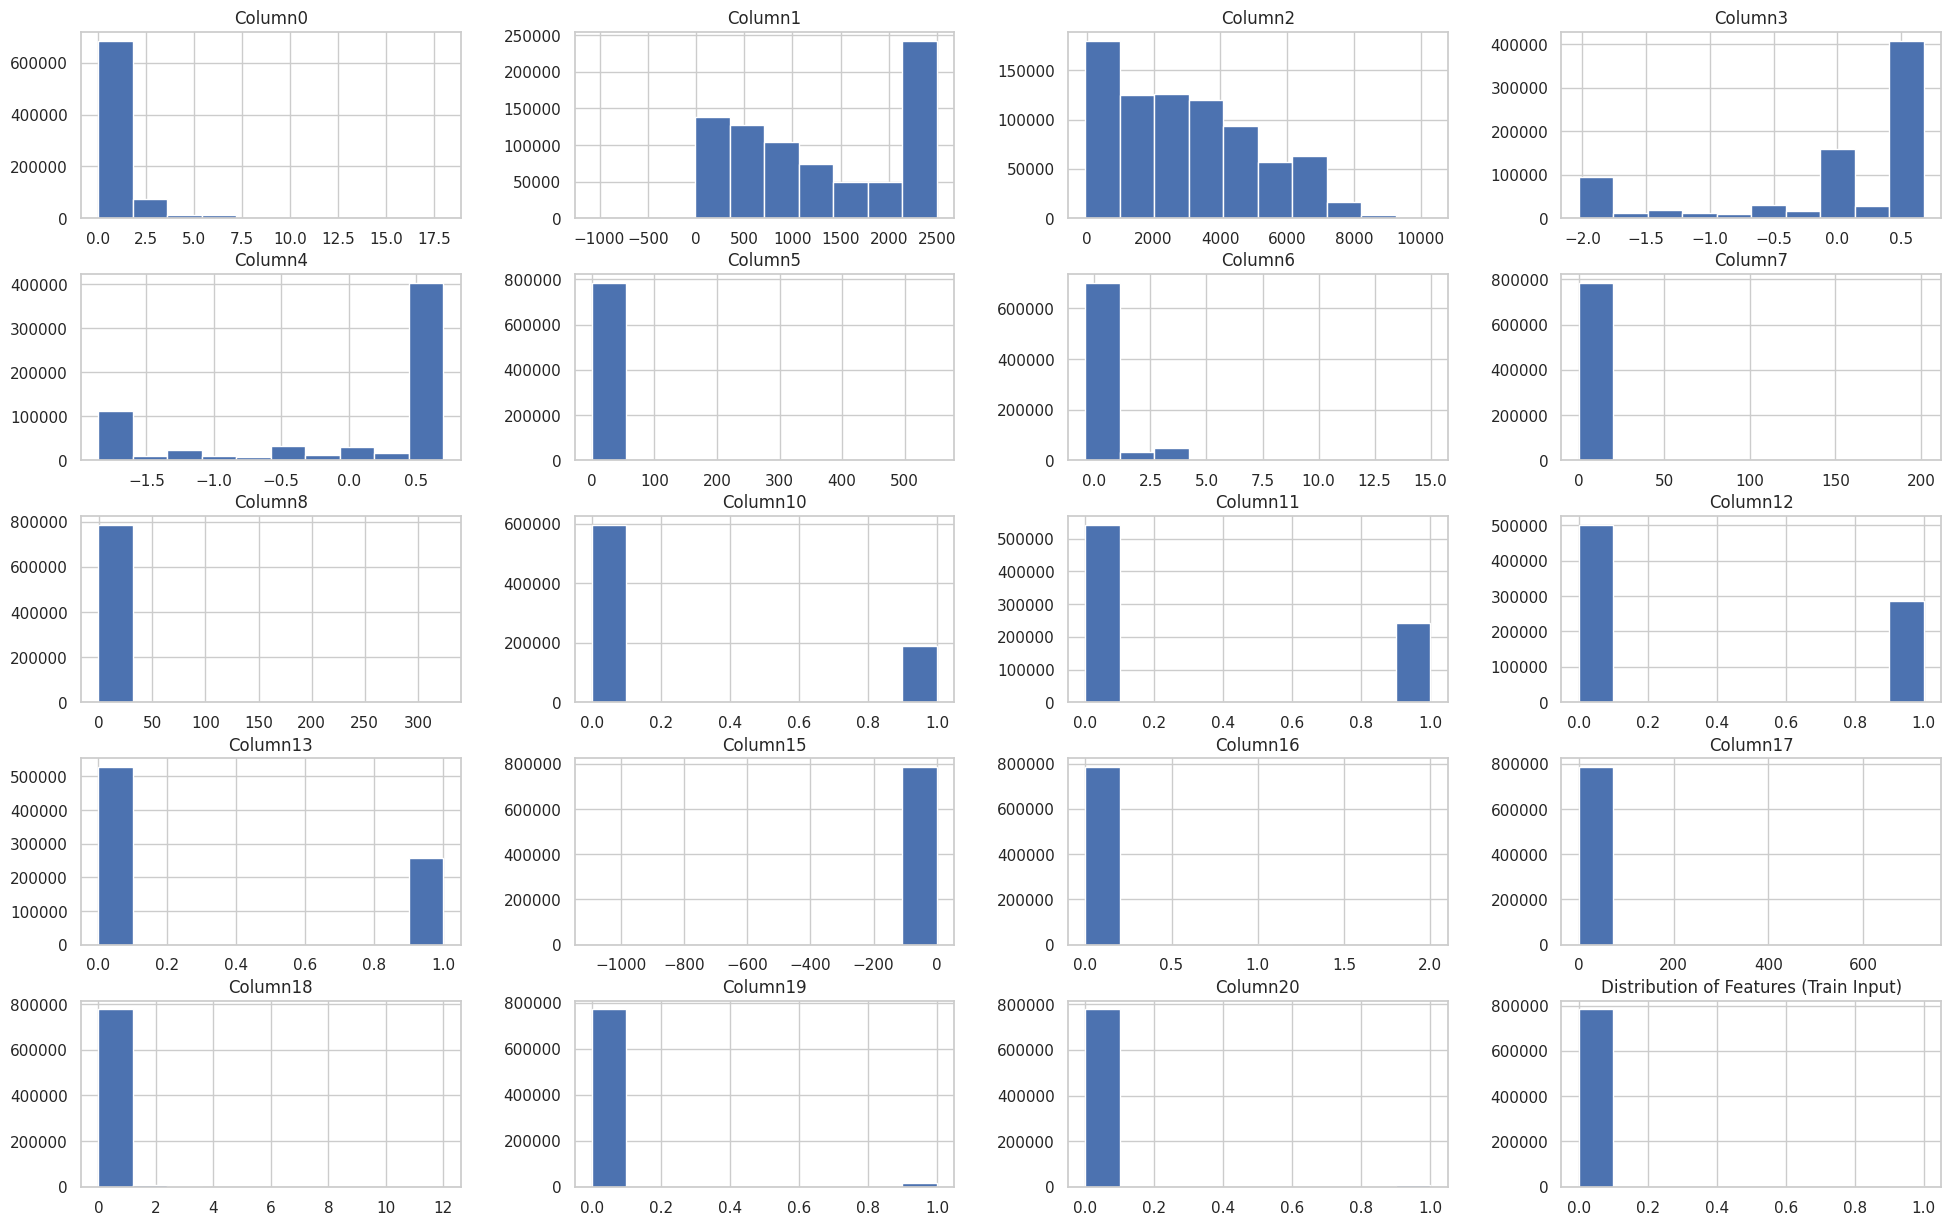

In [88]:
# Chart - 2 visualization code
x_train.hist(figsize=(24, 15))
plt.title('Distribution of Features (Train Input)')
plt.show()

##### 1. Why did you pick the specific chart?

I am able to see the distribution of the unique values in each column of the dataset.

##### 2. What is/are the insight(s) found from the chart?

We see that many columns are biased with one values and some columns have large variety of unique values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this insight will help us to see that we should apply feature selection for the column.

#### Chart - 3

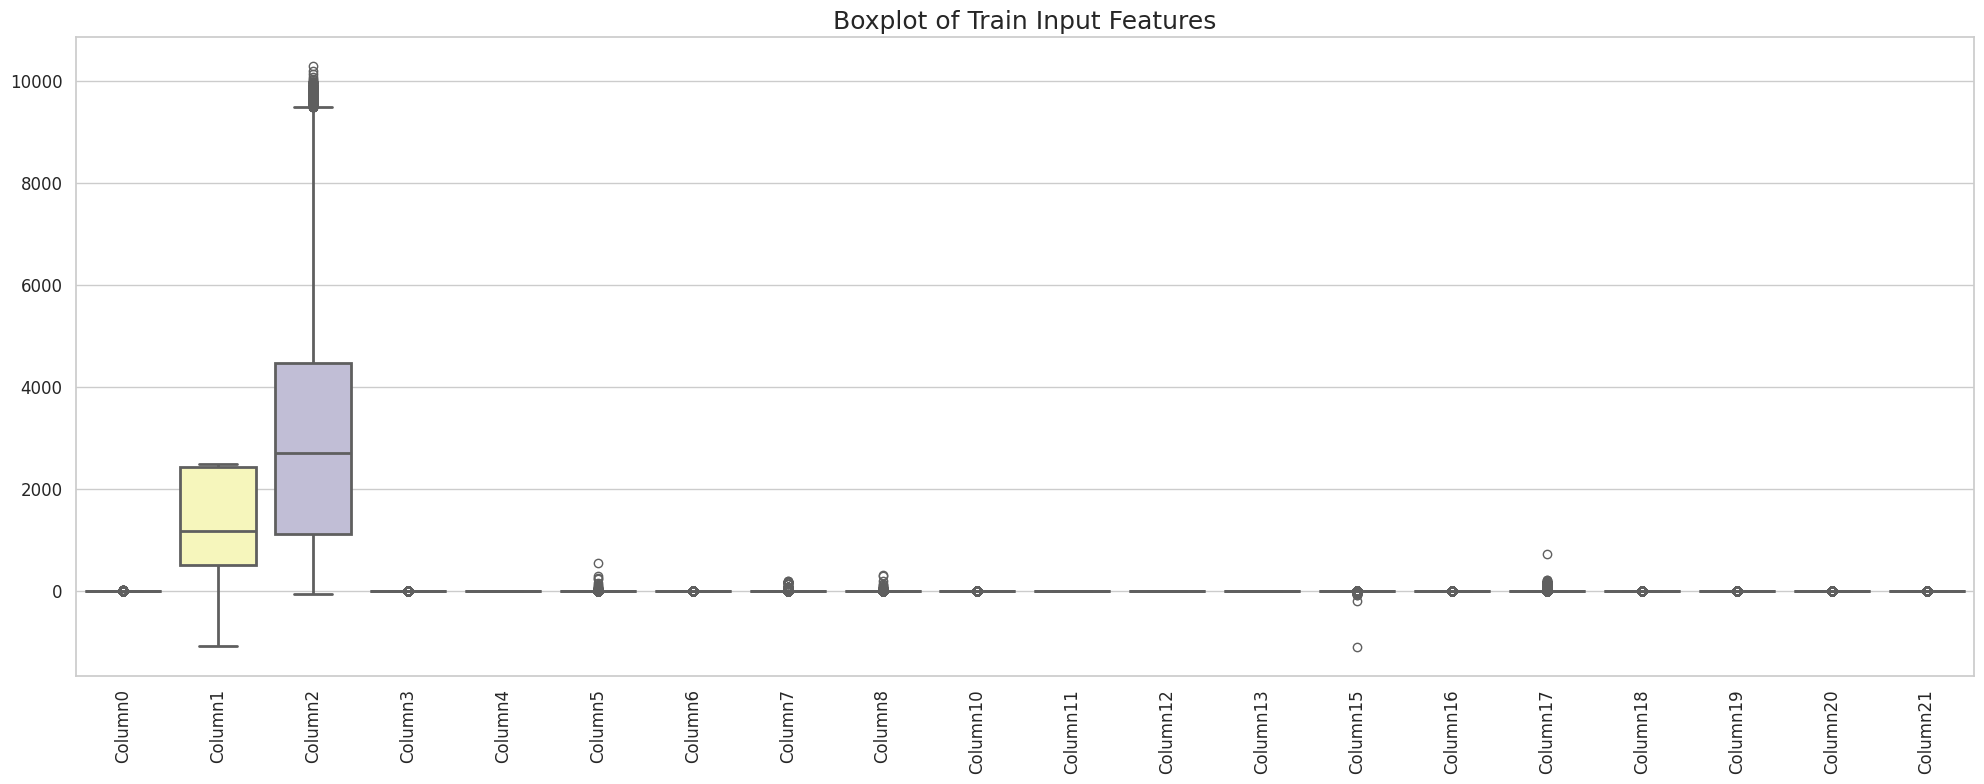

In [89]:
# Chart - 3 visualization code
plt.figure(figsize=(20, 8))
sns.boxplot(data=x_train, palette="Set3", showfliers=True, linewidth=2)
plt.title('Boxplot of Train Input Features', fontsize=18)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To see the outliers in the model

##### 2. What is/are the insight(s) found from the chart?

The model has a lot of outliers in the columns.
Here we can see that the most of the columns have there mean near 0.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Keeping this map in mind we observe that further we have to handle the outliers. and also we have to apply scaling in our model.

#### Chart - 4 - Correlation Heatmap

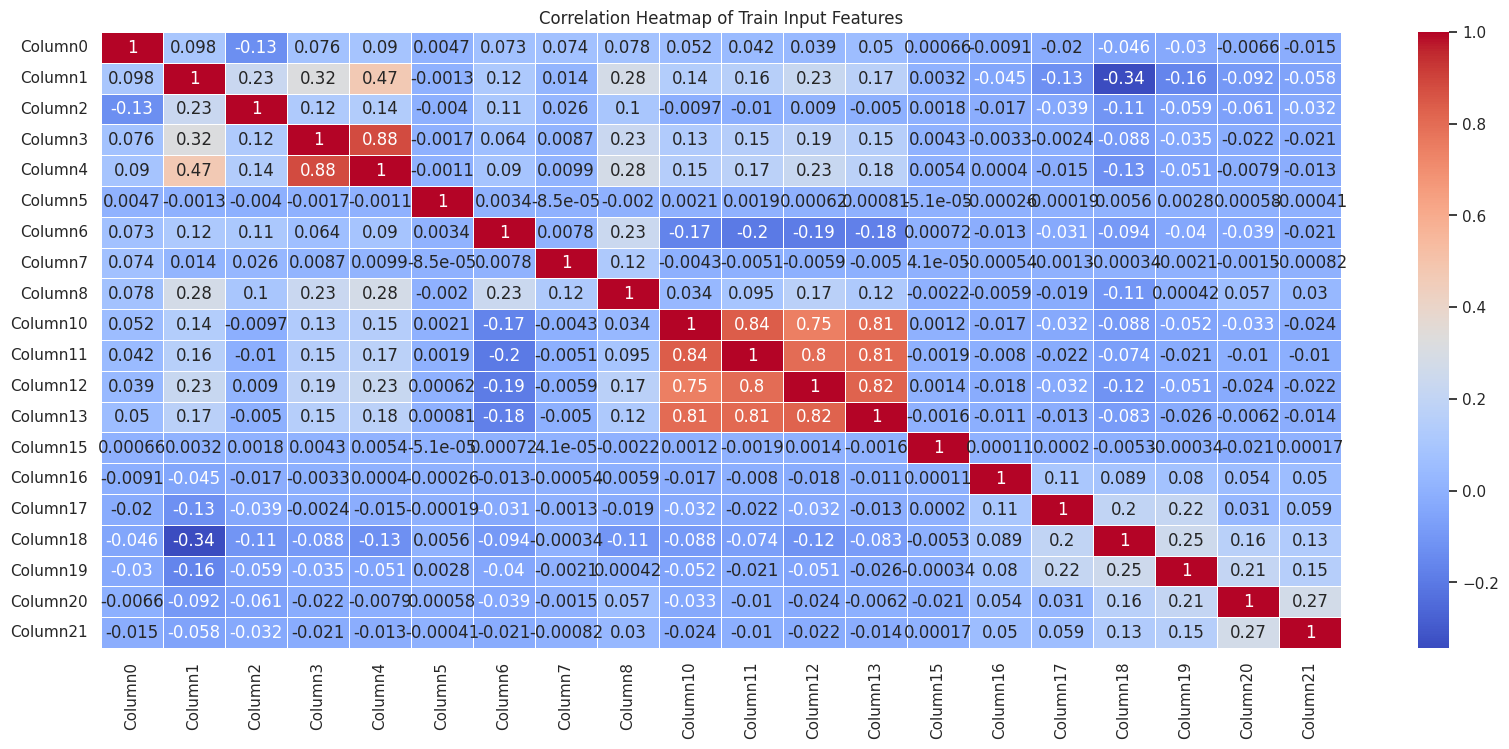

In [90]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20, 8))
correlation_matrix = x_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Train Input Features')
plt.show()

##### 1. Why did you pick the specific chart?

I picked heatmap() which used to the correlation between all features in matrix format.

##### 2. What is/are the insight(s) found from the chart?

Here i see that Column3, Column4 are highly correlated to each other and
Column10, Column11, Column12, Column13 are also highly correlated to each other . rest are moderately or negatively correlated.

Further this can lead to multicollinearity in the data . So, we also need to handle that.

#### Chart - 5 - Pair Plot

In [91]:
# Pair Plot visualization code
sns.pairplot(x_train)
plt.show()

##### 1. Why did you pick the specific chart?

Pairplot is a function in the seaborn library in Python that is used to create a matrix of scatter plots to visualize the relationship between multiple variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

Inference:-

1.We can see the how data is scattered to each other.

## ***5. Feature Engineering & Data Pre-processing***

### 2. Feature Manipulation

#### 1. Feature Manipulation

In [92]:
imputer = SimpleImputer(strategy='mean')
x_train['Column4'] = imputer.fit_transform(x_train[['Column4']])
x_test['Column4'] = imputer.fit_transform(x_test[['Column4']])
x_test.isnull().sum()

,0
Column0,0
Column1,0
Column2,0
Column3,0
Column4,0
Column5,0
Column6,0
Column7,0
Column8,0
Column10,0


In [93]:
# Applying Yeo Johnson Transformation to handle the skewness in the dataset
pt1 = PowerTransformer(method='yeo-johnson', standardize=True)
x_train_transformed = pt1.fit_transform(x_train)
x_test_transformed = pt1.transform(x_test)

x_train=pd.DataFrame(x_train_transformed,columns=x_train.columns, index=x_train.index)
x_test=pd.DataFrame(x_test_transformed,columns=x_test.columns,index=x_test.index)

In [94]:
x_train

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,Column11,Column12,Column13,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,2.045335,1.192264,0.509624,0.936333,0.929950,-0.521817,1.905304,-0.119805,0.874143,-0.562836,-0.670974,-0.755089,-0.699089,0.162304,-0.034677,-0.155068,-0.387295,-0.138265,-0.097157,-0.052584
1,-0.496970,1.192264,0.408778,0.318205,0.929950,-0.521796,2.120961,-0.034412,0.602278,-0.562836,-0.670974,-0.755089,-0.699089,0.162304,-0.034677,-0.155068,-0.387295,-0.138265,-0.097157,-0.052584
2,2.045335,1.192264,0.792966,-1.531499,-1.454811,-0.522389,-0.547832,-0.133566,-1.024376,1.776715,1.490370,1.324347,1.430433,0.162304,-0.034677,-0.155068,-0.387295,-0.138265,-0.097157,-0.052584
3,-0.496970,-1.246271,-1.795359,-0.532824,-0.495436,1.912759,-0.547832,-0.133566,-1.024376,-0.562836,-0.670974,-0.755089,-0.699089,0.162304,-0.034677,-0.155068,2.581814,-0.138265,-0.097157,-0.052584
4,-0.496970,-0.532906,-0.817435,-1.654768,-1.592732,1.912759,-0.547832,-0.133566,-1.024376,-0.562836,-0.670974,-0.755089,-0.699089,0.162304,-0.034677,-0.155068,-0.387295,-0.138265,-0.097157,-0.052584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785128,-0.496970,-1.093179,-0.699015,0.936333,0.929950,-0.522389,-0.547832,-0.133566,-1.024376,-0.562836,-0.670974,-0.755089,-0.699089,0.162304,-0.034677,-0.155068,2.581814,-0.138265,-0.097157,-0.052584
785129,-0.496970,1.192264,-0.085381,0.936333,0.929950,-0.521789,-0.547832,-0.133566,0.783015,1.776715,1.490370,1.324347,1.430433,0.162304,-0.034677,-0.155068,-0.387295,-0.138265,-0.097157,-0.052584
785130,-0.496970,1.192264,0.521977,0.936333,0.929950,-0.522389,-0.547832,-0.133566,0.481978,-0.562836,-0.670974,1.324347,1.430433,0.162304,-0.034677,-0.155068,-0.387295,-0.138265,-0.097157,-0.052584
785131,-0.496970,1.179773,0.776368,-0.530548,-0.409432,-0.521628,-0.547832,-0.133566,0.674737,1.776715,1.490370,1.324347,1.430433,0.162304,-0.034677,-0.155068,-0.387295,-0.138265,-0.097157,-0.052584


##### What all feature selection methods have you used  and why?

1.We just create some features by normal python function.

2.Drop some unwanted features.

3.We will do some features selection after removing of outliers.

### 3. Handling Outliers

In [95]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   785133 non-null  float64
 1   Column1   785133 non-null  float64
 2   Column2   785133 non-null  float64
 3   Column3   785133 non-null  float64
 4   Column4   785133 non-null  float64
 5   Column5   785133 non-null  float64
 6   Column6   785133 non-null  float64
 7   Column7   785133 non-null  float64
 8   Column8   785133 non-null  float64
 9   Column10  785133 non-null  float64
 10  Column11  785133 non-null  float64
 11  Column12  785133 non-null  float64
 12  Column13  785133 non-null  float64
 13  Column15  785133 non-null  float64
 14  Column16  785133 non-null  float64
 15  Column17  785133 non-null  float64
 16  Column18  785133 non-null  float64
 17  Column19  785133 non-null  float64
 18  Column20  785133 non-null  float64
 19  Column21  785133 non-null  float64
dtypes: f

<Axes: xlabel='Column0'>

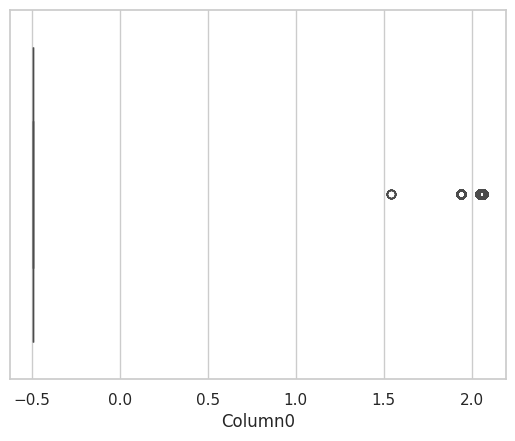

In [96]:
sns.boxplot(data = x_train,x='Column0')

In [97]:
# Handling Outliers & Outlier treatments
# We have some outliers in each features
Q1 = x_train.quantile(0.25)
Q3 = x_train.quantile(0.75)
IQR = Q3 - Q1
outlier1  = Q1 - 1.5*IQR
outlier2  = Q3 + 1.5*IQR

((x_train < outlier1) | (x_train > outlier2)).sum()


,0
Column0,155575
Column1,11
Column2,1
Column3,0
Column4,0
Column5,168842
Column6,175466
Column7,166760
Column8,253
Column10,188883


### 5. Feature  Selection






#### 1. Feature Selection

In [98]:
# Select your features wisely to avoid overfitting
# Import the library use in feature selection

from sklearn.feature_selection import f_regression
f_scores = f_regression(x_train,y_train)
f_scores[1]

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 2.08504540e-256, 0.00000000e+000, 1.25492988e-189,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

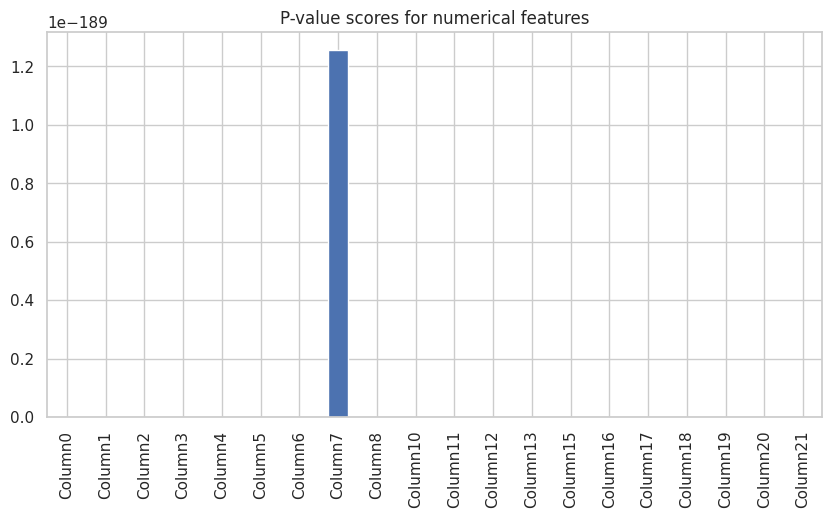

In [99]:
# find the p_values
p_values = pd.Series(f_scores[1],index = x_train.columns )
plt.figure(figsize = (10,5))
p_values.plot(kind = 'bar')
plt.title('P-value scores for numerical features')
plt.show()

In [100]:
# selectng p_value less than 0.005
selected_features = np.where(p_values<0.005)[0]
x_train = x_train.iloc[0: , selected_features]

In [101]:
# Getting VIF for best feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):

  vif = pd.DataFrame()
  vif['variables'] = x.columns
  vif['VIF'] = [variance_inflation_factor(x.values ,i) for i in range(x.shape[1])]

  return(vif)

In [102]:
calc_vif(x_train)

,variables,VIF
0,Column0,1.285288
1,Column1,1.754477
2,Column2,1.245216
3,Column3,4.696012
4,Column4,5.138703
5,Column5,1.770520
6,Column6,1.572846
7,Column7,1.121220
8,Column8,1.956219
9,Column10,4.231041






##### What all feature selection methods have you used  and why?

**Feature_selection**:-The function returns the F-value and p-value of the logistic regression test for each feature in the dataset, which can be used to select the features with the highest F-value and lowest p-value.

**VIF**:-The Variance Inflation Factor (VIF) is a statistical measure used to assess the degree of multicollinearity in a multiple regression model. Multicollinearity occurs when there is a high correlation between independent variables (also called predictor variables or features) in a regression model.



In [103]:
print(x_train.columns)

Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column10', 'Column11', 'Column12',
       'Column13', 'Column15', 'Column16', 'Column17', 'Column18', 'Column19',
       'Column20', 'Column21'],
      dtype='object')


In [104]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_sampled, y_train_sampled = smote.fit_resample(x_train, y_train)

# Verify the new class distribution after SMOTE
print("Original class distribution:\n", y_train.value_counts())
print("Sampled class distribution:\n", y_train_sampled.value_counts())


Original class distribution:
 target
0         711100
1          74033
Name: count, dtype: int64
Sampled class distribution:
 target
0         711100
1         711100
Name: count, dtype: int64





##### Which all features you found important and why?

These are some features which we can use in creating a model.We removed multicollinear features and  with feature_selection we found P-value.

## ***6. ML Model Implementation***

### ML Model -  Logistic Regression Model









In [105]:
# Initialize the Logistic Regression model
lr = LogisticRegression()

# Fit the model on the entire training dataset
lr.fit(x_train_sampled, y_train_sampled)

# Make predictions on the test set
y_pred = lr.predict(x_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric


In [106]:
# Visualizing evaluation Metric Score chart
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9665586599009598
Confusion Matrix:
 [[228310   8724]
 [    28  24650]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    237034
           1       0.74      1.00      0.85     24678

    accuracy                           0.97    261712
   macro avg       0.87      0.98      0.92    261712
weighted avg       0.98      0.97      0.97    261712



1.The first model we used is Logistic Regression.

2.Fit the algorithm and predict it.

The evaluation metrics we used are:-

1.**Cross Validation Score**:-The average performance metric (e.g., accuracy) obtained from cross-validating the model on different subsets of the data.

2.**Mean CV Accuracy**:-The average of all cross-validation scores, providing a single performance measure across all folds.

3.**Accuracy**:The ratio of correctly predicted instances to the total instances in the dataset.

4.**Confusion matrix**:A table that shows the true positive, true negative, false positive, and false negative counts, helping to visualize the performance of a classification model.

5.**Classification report**: A summary of precision, recall, F1-score, and support for each class in a classification problem.

#### 2. Cross- Validation & Hyperparameter Tuning

In [107]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Initialize the Logistic Regression model
lr = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(lr, x_train_sampled, y_train_sampled, cv=5)  # You can change cv to any number of folds you prefer

# Fit the model on the entire training dataset
lr.fit(x_train_sampled, y_train_sampled)

# Make predictions on the test set
y_pred = lr.predict(x_test)

# Print the results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Cross-Validation Scores: [0.98118057 0.98139502 0.98084658 0.98103994 0.98137744]
Mean CV Accuracy: 0.9811679088735762
Accuracy: 0.9665586599009598
Confusion Matrix:
 [[228310   8724]
 [    28  24650]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    237034
           1       0.74      1.00      0.85     24678

    accuracy                           0.97    261712
   macro avg       0.87      0.98      0.92    261712
weighted avg       0.98      0.97      0.97    261712



Cross-Validation Scores: [0.98118057,0.98139502,0.98084658,0.98103994,0.98137744]

Mean CV Accuracy: 0.9811679088735762

Accuracy: 0.9665586599009598

Confusion Matrix:
                                      
                                      [[228310 |  8724]
                                       [    28 | 24650]]



Classification Report:

               precision  recall  f1-score   support

           0       1.00      0.96      0.98    237034
           1       0.74      1.00      0.85     24678

    accuracy                           0.97    261712
    macro avg       0.87      0.98      0.92    261712
    weighted avg      0.98     0.97     0.97    261712

##### Which hyperparameter optimization technique have you used and why?

**GridSearch CV**:-

GridSearchCV is a method in scikit-learn library, used to tune hyperparameters of a model by exhaustively trying every combination of provided parameter values. It takes an estimator (model), a set of hyperparameters to search over, and a scoring method as input and returns the best combination of parameters that gives the best score as output.

This way GridSearchCV makes the process of tuning the parameters of a model more efficient and less time-consuming.

### ML Model - Random Forest Classifier

In [108]:
# ML Model - 2  Implementation
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
rf_clf.fit(x_train_sampled, y_train_sampled)

# Predict the labels of the test data
y_pred = rf_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9752399584275845
Confusion Matrix:
 [[231440   5594]
 [   886  23792]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    237034
           1       0.81      0.96      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.90      0.97      0.93    261712
weighted avg       0.98      0.98      0.98    261712



In [109]:
# Initialize the Random Forest model
rf_clf = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf_clf, x_train_sampled, y_train_sampled, cv=5)

rf_clf.fit(x_train_sampled, y_train_sampled)

y_pred = rf_clf.predict(x_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [110]:
# Visualizing evaluation Metric Score chart
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Cross-Validation Scores: [0.97829068 0.98735761 0.9871748  0.98716425 0.98720996]
Mean CV Accuracy: 0.9854394599915623
Accuracy: 0.9753125573149111
Confusion Matrix:
 [[231450   5584]
 [   877  23801]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    237034
           1       0.81      0.96      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.90      0.97      0.93    261712
weighted avg       0.98      0.98      0.98    261712



Cross-Validation Scores: [0.97829068,0.98735761,0.9871748,0.98716425,0.98720996]

Mean CV Accuracy: 0.9854394599915623

Accuracy: 0.9753125573149111

Confusion Matrix:

                           [[231450   5584]
                           [   877  23801]]
                           
Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.98      0.99    237034
           1       0.81      0.96      0.88     24678

    accuracy                           0.98    261712
    macro avg       0.90      0.97      0.93    261712
    weighted avg       0.98      0.98      0.98    261712

AUC-ROC Score: 0.9933


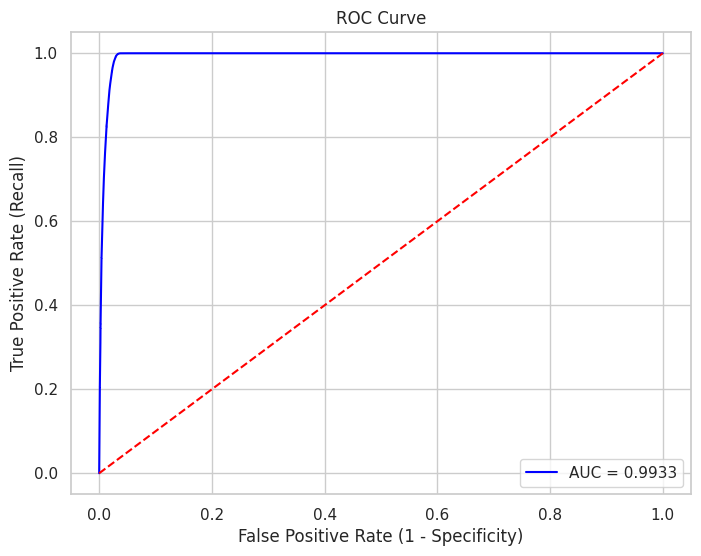

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score
# Step 4: Predict probabilities for the test set
y_pred_prob = rf_clf.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class (1)

# Step 5: Calculate AUC-ROC score
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {auc:.4f}")

# Step 6: Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 7: Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

### ML Model - AdaBoost

In [112]:
# ML Model - 3 Implementation
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(x_train_sampled,y_train_sampled)
y_pred = model.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [113]:
# Visualizing evaluation Metric Score chart
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9705783456624075
Confusion Matrix:
 [[229494   7540]
 [   160  24518]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    237034
           1       0.76      0.99      0.86     24678

    accuracy                           0.97    261712
   macro avg       0.88      0.98      0.92    261712
weighted avg       0.98      0.97      0.97    261712



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



Accuracy: 0.9705783456624075

Confusion Matrix:

                      [[229494   7540]
                    [   160  24518]]
Classification Report:


               precision    recall  f1-score   support

           0       1.00      0.97      0.98    237034
           1       0.76      0.99      0.86     24678

    accuracy                           0.97    261712
    macro avg       0.88      0.98      0.92    261712
    weighted avg       0.98      0.97      0.97    261712

### ML Model - XgBoost

In [114]:
# ML Model - 3 Implementation
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(x_train_sampled, y_train_sampled)
y_pred = model.predict(x_test)

In [115]:
model = xgb.XGBClassifier()

# Perform cross-validation
cv_scores = cross_val_score(model, x_train_sampled, y_train_sampled, cv=5)

model.fit(x_train_sampled, y_train_sampled)

y_pred = lr.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [116]:
# Visualizing evaluation Metric Score chart
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9665586599009598
Confusion Matrix:
 [[228310   8724]
 [    28  24650]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    237034
           1       0.74      1.00      0.85     24678

    accuracy                           0.97    261712
   macro avg       0.87      0.98      0.92    261712
weighted avg       0.98      0.97      0.97    261712





Accuracy: 0.9723894968515009

Confusion Matrix:


                         [[230034   7000]
                         [   226  24452]]

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.97      0.98    237034
           1       0.78      0.99      0.87     24678

    accuracy                           0.97    261712
    macro avg       0.89      0.98      0.93    261712
    weighted avg       0.98      0.97      0.97    261712

### ML Model - lightgbm

In [117]:
# ML Model - 3 Implementation
import lightgbm as lgb

model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(x_train_sampled, y_train_sampled)
y_pred = model.predict(x_test)


[LightGBM] [Info] Number of positive: 711100, number of negative: 711100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.193629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3308
[LightGBM] [Info] Number of data points in the train set: 1422200, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [118]:
# Visualizing evaluation Metric Score chart
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9734249862444213
Confusion Matrix:
 [[230396   6638]
 [   317  24361]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    237034
           1       0.79      0.99      0.88     24678

    accuracy                           0.97    261712
   macro avg       0.89      0.98      0.93    261712
weighted avg       0.98      0.97      0.97    261712



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


Accuracy: 0.9734249862444213

Confusion Matrix:

                          [[230396   6638]
                          [   317  24361]]
Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.97      0.99    237034
           1       0.79      0.99      0.88     24678

    accuracy                           0.97    261712
    macro avg       0.89      0.98      0.93    261712
    weighted avg       0.98      0.97      0.97    261712

### ML Model - Decision Tree

In [119]:
# ML Model - 3 Implementation
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train_sampled, y_train_sampled)
y_pred = model.predict(x_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [120]:
# Visualizing evaluation Metric Score chart
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9705630616861283
Confusion Matrix:
 [[232222   4812]
 [  2892  21786]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98    237034
           1       0.82      0.88      0.85     24678

    accuracy                           0.97    261712
   macro avg       0.90      0.93      0.92    261712
weighted avg       0.97      0.97      0.97    261712



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



Accuracy: 0.9705630616861283

Confusion Matrix:

                     [[232222   4812]
                     [  2892  21786]]
Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.98      0.98    237034
           1       0.82      0.88      0.85     24678

    accuracy                           0.97    261712
    macro avg       0.90      0.93      0.92    261712
    weighted avg       0.97      0.97      0.97    261712

### ML Model - CatBoost

In [121]:
pip install catboost

In [122]:
# ML Model - 3 Implementation
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=0)
model.fit(x_train_sampled, y_train_sampled)
y_pred = model.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [123]:
# Visualizing evaluation Metric Score chart
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9718965886164944
Confusion Matrix:
 [[229898   7136]
 [   219  24459]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    237034
           1       0.77      0.99      0.87     24678

    accuracy                           0.97    261712
   macro avg       0.89      0.98      0.93    261712
weighted avg       0.98      0.97      0.97    261712



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Cross-Validation Scores: [0.98118057,0.98139502,0.98084658,0.98103994,0.98137744]

Mean CV Accuracy: 0.9811679088735762

Accuracy: 0.9718965886164944

Confusion Matrix:

                        [[229898   7136]
                        [   219  24459]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.97      0.98    237034
           1       0.77      0.99      0.87     24678

    accuracy                           0.97    261712
    macro avg       0.89      0.98      0.93    261712
    weighted avg       0.98      0.97      0.97    261712

### ML Model - GaussianNB

In [124]:
# ML Model - 3 Implementation
gnb = GaussianNB()

# Train the model using the training data
gnb.fit(x_train_sampled, y_train_sampled)

# Predict the labels of the test data
y_pred = gnb.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [125]:
# Visualizing evaluation Metric Score chart
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9703987589411261
Confusion Matrix:
 [[229791   7243]
 [   504  24174]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    237034
           1       0.77      0.98      0.86     24678

    accuracy                           0.97    261712
   macro avg       0.88      0.97      0.92    261712
weighted avg       0.98      0.97      0.97    261712



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



Accuracy: 0.9703987589411261

Confusion Matrix:

                    [[229791   7243]
                   [   504  24174]]

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.97      0.98    237034
           1       0.77      0.98      0.86     24678

    accuracy                           0.97    261712
    macro avg       0.88      0.97      0.92    261712
    weighted avg       0.98      0.97      0.97    261712

### Model Performance Report

Cross-Validation Scores: [0.97829068,0.98735761,0.9871748,0.98716425,0.98720996]

Mean CV Accuracy: 0.9854394599915623

Accuracy: 0.9753125573149111

Confusion Matrix:

                         [[231450   5584]
                         [   877  23801]]

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.98      0.99    237034
           1       0.81      0.96      0.88     24678

    accuracy                           0.98    261712
    macro avg       0.90      0.97      0.93    261712
    weighted avg       0.98      0.98      0.98    261712

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Random Forest as a model, Random Forest models are known for their interpretability, as it is relatively easy to understand how the model is making predictions. One way to understand feature importance in Random Forest is by using the feature_importances_ attribute of the model, which returns the importance of each feature in the dataset.

#**Conclusion**

Here we can easily see comparision Evaluation metric score chart of all the models.

###RandomForest Regressor giving us the best result

###So, after comparing accuracy it is evident that ***Random Forest Classifier*** is the best performer.